<a href="https://colab.research.google.com/github/shrestha94sujan/stocks_analysis/blob/master/stocks_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
print('hello world of stocks!')

hello world of stocks!


**Installing yfinance api for importing the financial stuffs.**

In [7]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=9e77fd0f86da6b94fda89a27484679a211d34bd26dd2a0e8826541b8b67f82ca
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


**Adding import statements.**

In [8]:
import yfinance as yf

# Just get the AAPL stocks, cuz frankly that's all i am interested in, lol
aapl = yf.Ticker('AAPL')

#get historical market data
hist = aapl.history(period='30y')
hist.reset_index(inplace=True)

#if you wish to look at the entire historical data for last 30 years!
hist

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1990-05-14,1.24,1.24,1.20,1.21,56596400,0.00,0.0
1,1990-05-15,1.20,1.22,1.19,1.21,37346400,0.00,0.0
2,1990-05-16,1.21,1.21,1.19,1.21,21826000,0.00,0.0
3,1990-05-17,1.21,1.22,1.19,1.20,38396400,0.00,0.0
4,1990-05-18,1.20,1.20,1.14,1.15,64615600,0.00,0.0
...,...,...,...,...,...,...,...,...
7552,2020-05-05,294.26,300.19,293.67,296.76,36937800,0.00,0.0
7553,2020-05-06,299.65,302.42,298.06,299.82,35583400,0.00,0.0
7554,2020-05-07,302.40,304.35,301.15,302.92,28803800,0.00,0.0
7555,2020-05-08,305.64,310.35,304.29,310.13,33512000,0.82,0.0


**Historical charts that shows opening and closing stock prices.**

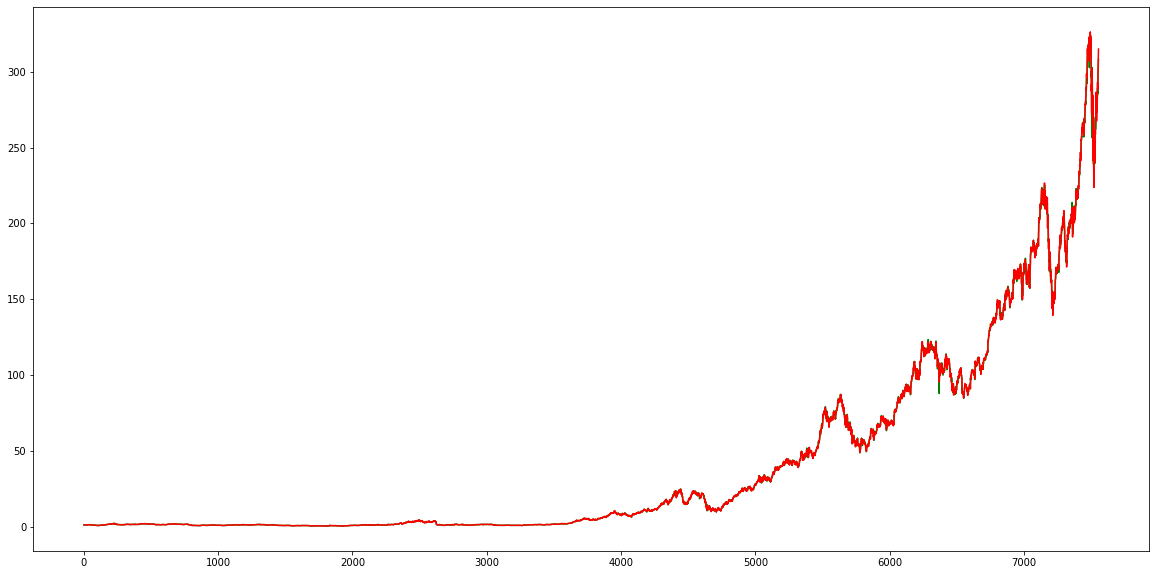

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn
from matplotlib.ticker import FixedFormatter, FixedLocator
%matplotlib inline

#Plot Open and Close prices.
plt.figure(figsize=(20, 10))
plt.plot(hist['Open'], color='green')
plt.plot(hist['Close'], color='red')



As we can see, the chart really doesn't help us draw a good understanding of the stock except show an increasing trend! That's where the Data modeling and clustering comes in. 

**Modeling our stock price data to meet requirements.**

<function matplotlib.pyplot.show>

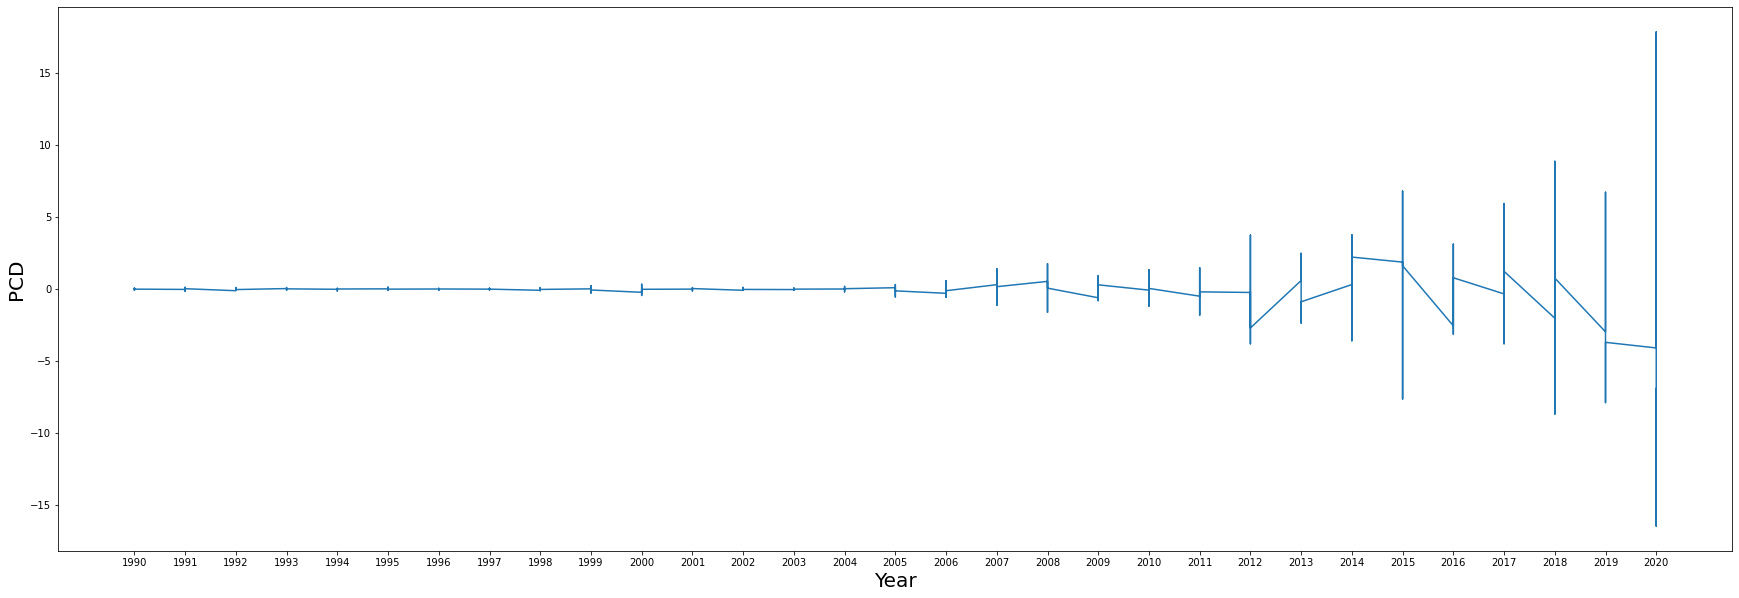

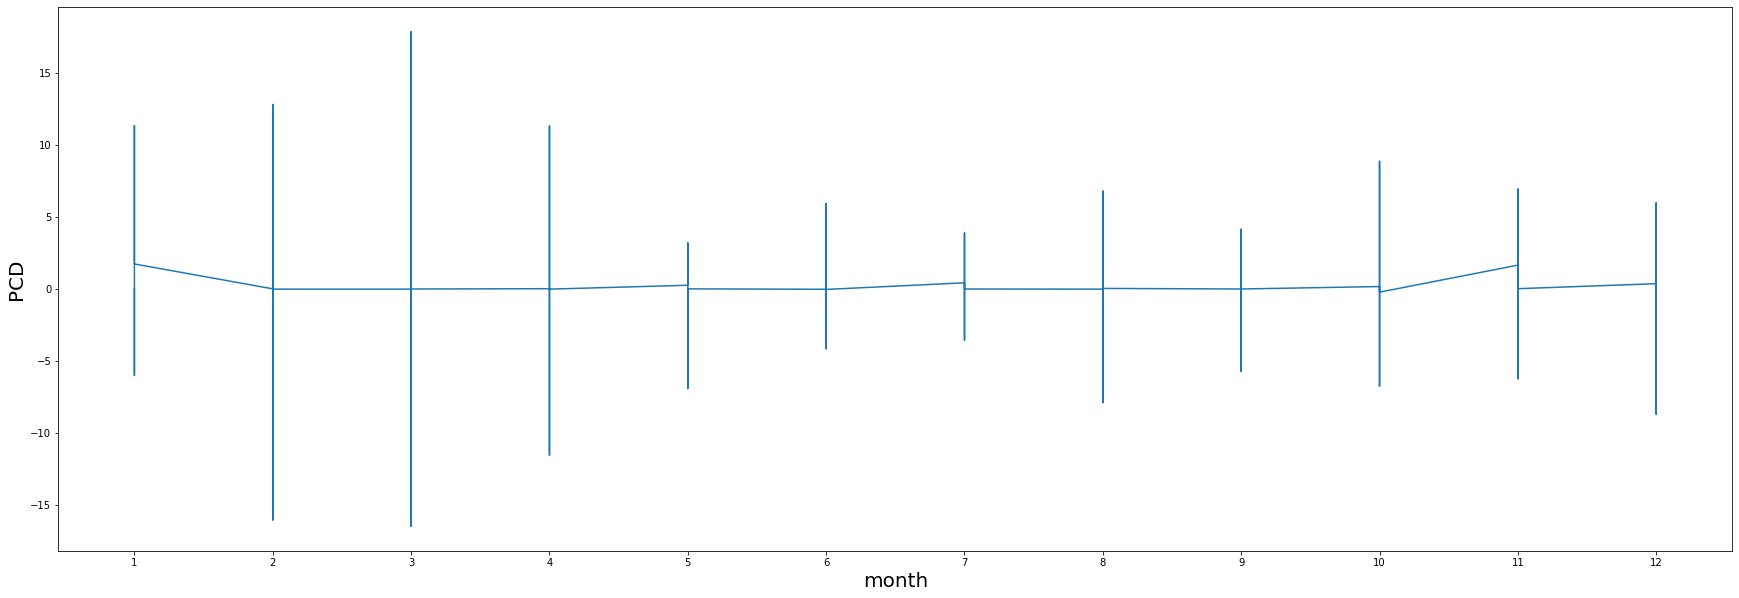

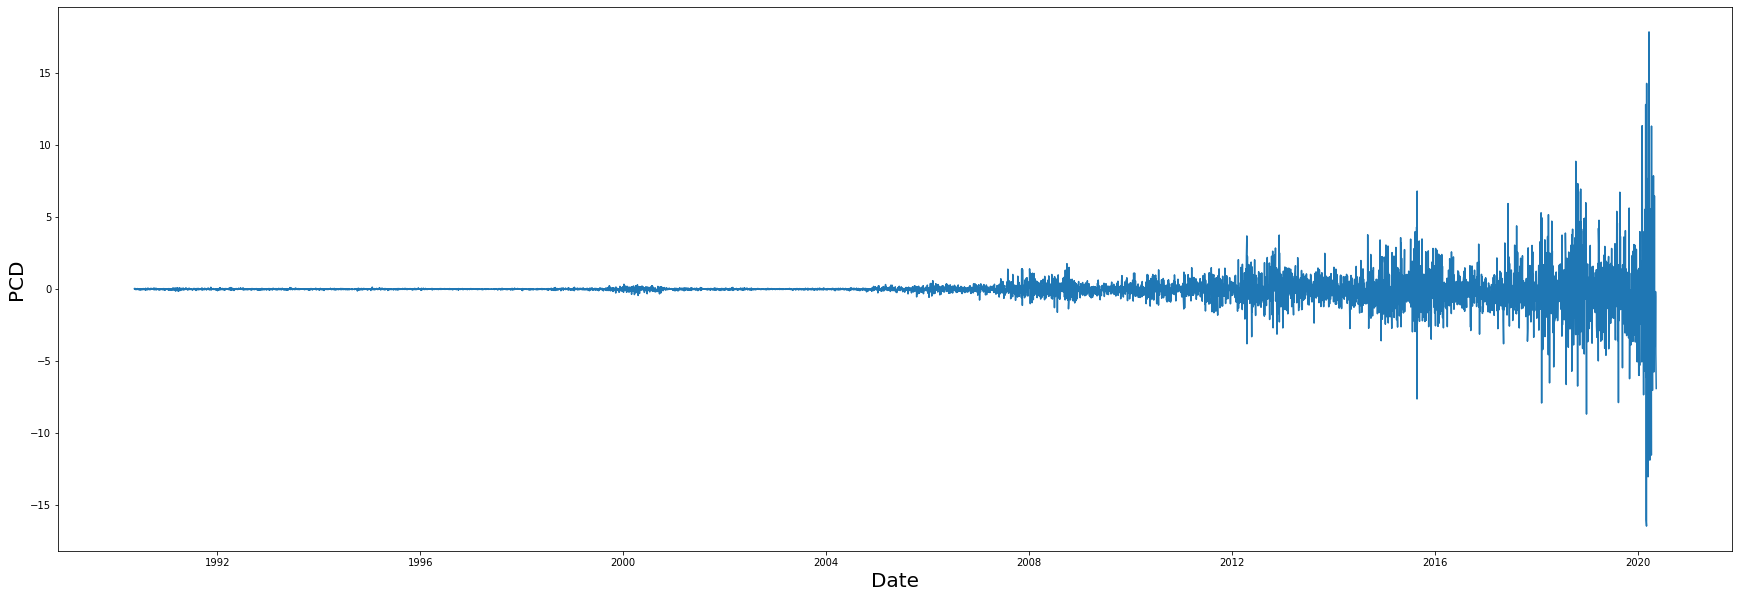

In [14]:
import pandas as pd
import numpy as np


pd.set_option('display.max_rows', None)

#price change per day
pcd = hist['Open'] - hist['Close']

# print(pcd)  #printing out price change per day just becuz.
hist['PCD'] = pcd #Storing vaules in a new 'PCD' column

years = pd.DatetimeIndex(hist['Date']).year #Getting years from the datetime index from the timeseries data
hist['YEAR'] = years

months = pd.DatetimeIndex(hist['Date']).month #Getting months from the datetime index from the timeseries data
hist['MONTH'] = months

#Getting min and max year for x axis
min_year = np.amin(np.asarray(hist['YEAR']))
max_year = np.amax(np.asarray(hist['YEAR']))

#Plotting the PCD against YEAR
plt.figure(figsize=(30, 10))  #Setting the figure size
plt.plot(hist['YEAR'], hist['PCD'])
plt.xlabel('Year', fontsize=20)
plt.xticks(range(min_year, max_year + 1))
plt.ylabel('PCD', fontsize=20)

#Plotting the PCD against MONTH
sorted_hist = hist.copy()
sorted_hist.sort_values(by='MONTH', inplace=True)
plt.figure(figsize=(30, 10))  #Setting the figure size
plt.plot(sorted_hist['MONTH'], sorted_hist['PCD'])
plt.xlabel('month', fontsize=20)
plt.xticks(range(1,13))
plt.ylabel('PCD', fontsize=20)

#Plotting the PCD against Date
plt.figure(figsize=(30, 10))  #Setting the figure size
plt.plot(hist['Date'], hist['PCD'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('PCD', fontsize=20)

plt.show


**Observation:**   Important observations 

**Note 1:** In the first figure, is that the volatility of the stock prices is increasing wrt years. As we further in years, we may notice even more volatility(fluctuation) in the stock prices!

Now, one might share an opinion that volatile stock prices is not a sign of a good stock, but another might share a different opinion!, that although high risk associated to volatility, the return might be very high depending on when the stock is purchased and sold. 

**Note 2:** In the second figure, we can observe that the volatility is really high during first 4 months of the year, and kind of stabilizes a little for rest of the months of the year. And, we know this pattern continues for every year, since our figure is a result of aggregating 30 years worth of data.

**Note 3:** In the third figure, we can observe occasional spikes in the volatility, but we can still see there is an increasing trend in the volatility as suggested by Note 1.

# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;**KMEANS**

---



In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

### **Finding optimal number of clusters**

### 1.   **Elbow Curve** method



In [88]:
X1 = hist[['YEAR', 'PCD']]  #Feature set to investigate relation between YEAR and PCD
X2 = hist[['MONTH', 'PCD']] #Feature set to investigate relation between MONTH and PCD

print('Feature set YEAR and PCD\n')
print(X1.iloc[:5]) #printing out top 5 data in X1 & X2, may be for debugging later on!

print('\nFeature set MONTH and PCD\n')
print(X2.iloc[:5])

kmeans_per_k_X1 = [KMeans(n_clusters=k, random_state=43).fit(X1) 
                for k in range(1,15)]

kmeans_per_k_X2 = [KMeans(n_clusters=k, random_state=43).fit(X2) 
                for k in range(1,15)]
                

inertias_X1 = [model.inertia_ for model in kmeans_per_k_X1] #inertias for all models in kmeans_per_k_X1
inertias_X2 = [model.inertia_ for model in kmeans_per_k_X2] #inertias for all models in kmeans_per_k_X2

Feature set YEAR and PCD

   YEAR   PCD
0  1990  0.03
1  1990 -0.01
2  1990  0.00
3  1990  0.01
4  1990  0.05

Feature set MONTH and PCD

   MONTH   PCD
0      5  0.03
1      5 -0.01
2      5  0.00
3      5  0.01
4      5  0.05


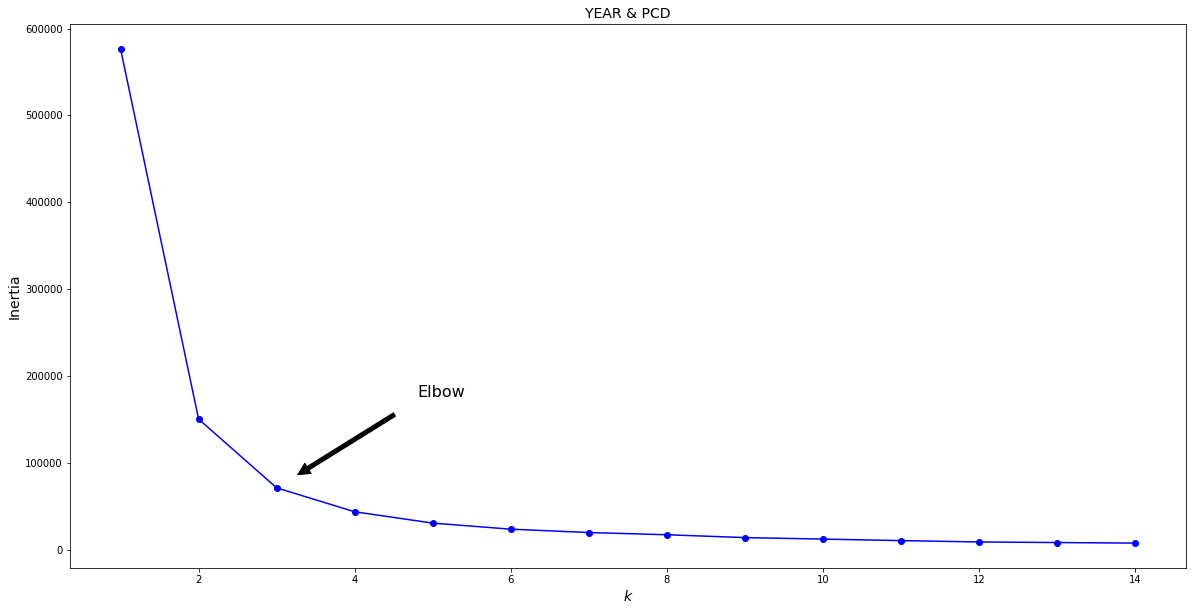

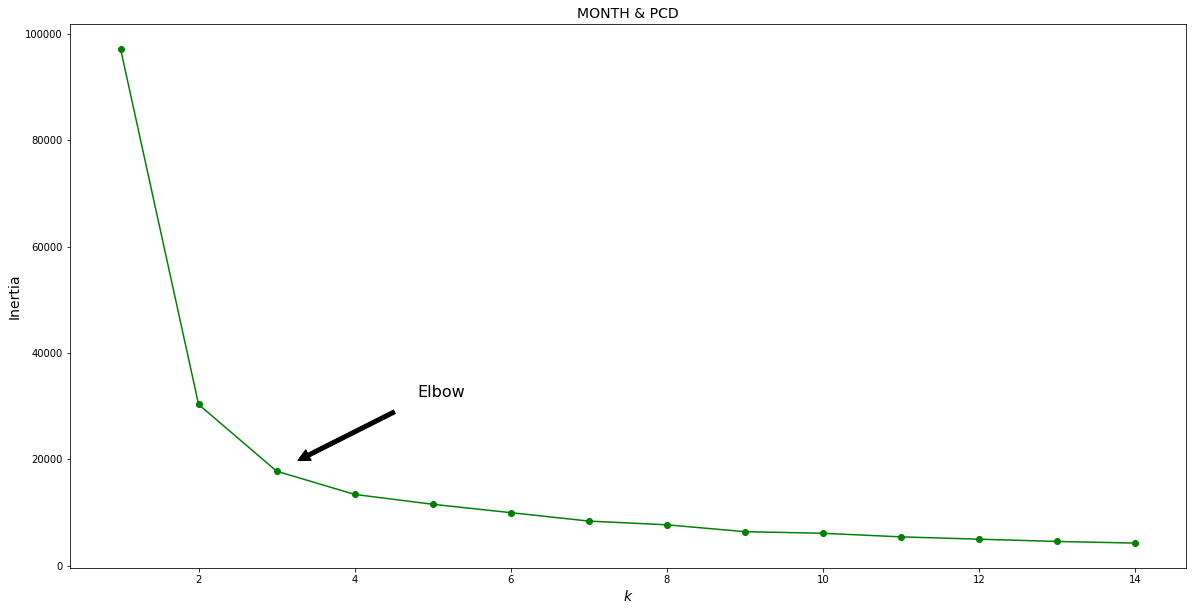

In [89]:
#Feature set YEAR & PCD
plt.figure(figsize=(20, 10))
plt.plot(range(1, 15), inertias_X1, 'bo-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('YEAR & PCD', fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias_X1[2]),
             xytext=(0.35, 0.35),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.15)
            )
plt.show()

#Feature set MONTH & PCD
plt.figure(figsize=(20, 10))
plt.plot(range(1, 15), inertias_X2, 'go-')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('MONTH & PCD', fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias_X2[2]),
             xytext=(0.35, 0.35),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.15)
            )
plt.show()

### **Observation**
We see that there is an elbow at $k=3$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half.

So $k=3$ is a pretty good choice.

### **2.    Silhouette score vs 𝑘**

The silhouette coefficient can vary between -1 and +1:

*   A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters.
*   A coefficient close to 0 means that it is close to a cluster boundary.
*   A coefficient close to -1 means that the instance may have been assigned to the wrong cluster.




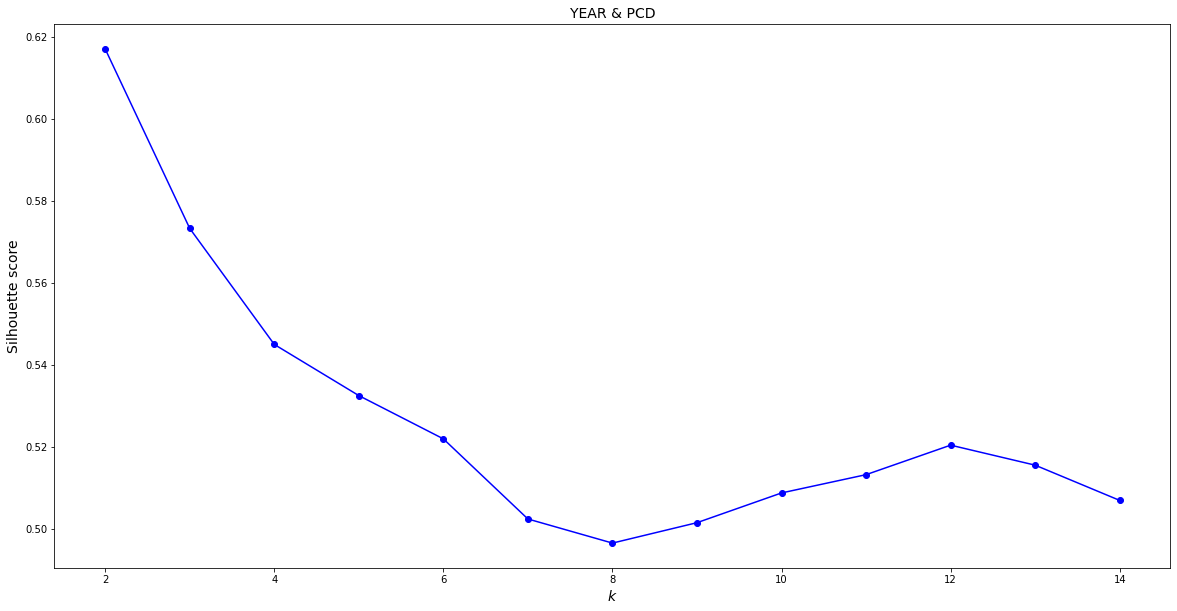

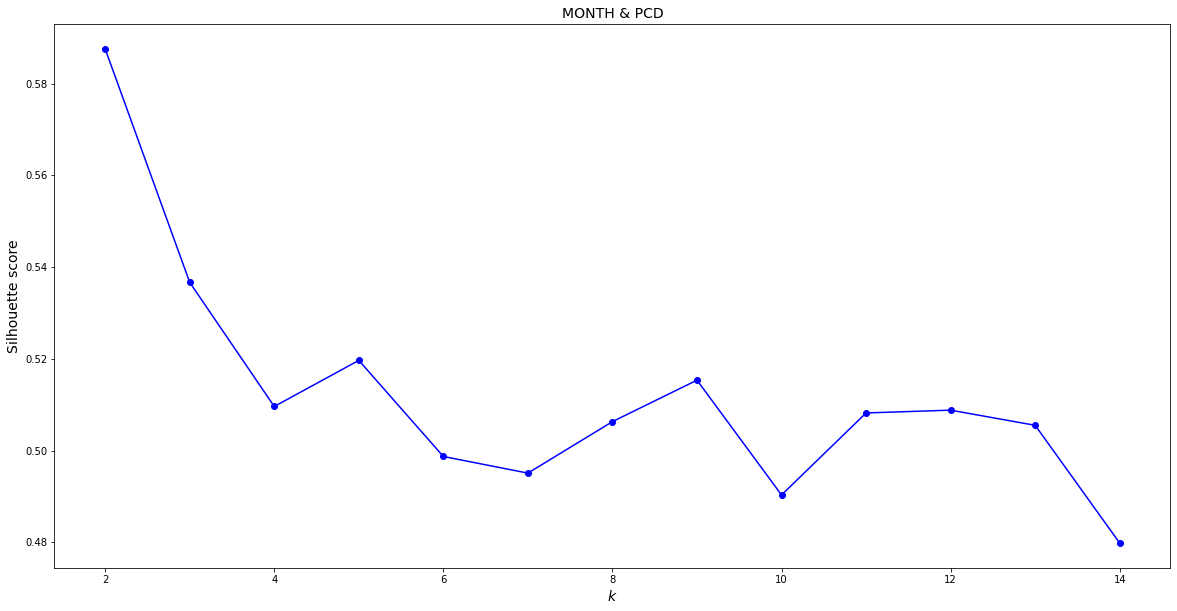

In [90]:
#Feature set YEAR & PCD
silhouette_scores_X1 = [silhouette_score(X1, model.labels_) 
                      for model in kmeans_per_k_X1[1:]]    #silhouette scores for models in kmeans_per_k starting at index=1

plt.figure(figsize=(20, 10))
plt.title('YEAR & PCD', fontsize=14)
plt.plot(range(2, 15), silhouette_scores_X1, 'bo-')  #setting the range for plot equal to the range used for kmeans.
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()


#Feature set MONTH & PCD
silhouette_scores_X2 = [silhouette_score(X2, model.labels_) 
                      for model in kmeans_per_k_X2[1:]]    #silhouette scores for models in kmeans_per_k starting at index=1

plt.figure(figsize=(20, 10))
plt.title('MONTH & PCD', fontsize=14)
plt.plot(range(2, 15), silhouette_scores_X2, 'bo-')  #setting the range for plot equal to the range used for kmeans.
plt.xlabel('$k$', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.show()





## **Observation**

This visualization is much better than the previous one: However it doesn't confirm that $k$ = 3 is a good choice since silhouette score goes up & down continuously, therefore we still can't be sure of optimal $k$ until we look at the Silhouette Diagram.

## **3. Silhouette Diagram** 

An even more informative visualization is given when we plot every instance's silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient.

This is called a silhouette diagram.

Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient.

### **Note:**
Since we got an elbow curve at $k$ = 3, we will select that optimal $k$ as a starting point upto $k$ = 8 to find the best optimal $k$.

In [0]:
def silhouette_diagram(kmeans_per_k, X, silhouette_scores):
  plt.figure(figsize=(20,15))

  for k in (2, 3, 4, 5, 6, 7, 8):
    plt.subplot(4, 2, k - 1)

    y_pred = kmeans_per_k[k - 1].labels_ # using k - 1 because its a list and k = 3 is in 3-1 = 2nd position in the list.
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X)
    pos = padding
    ticks = []

    for i in range(k):
      coeffs = silhouette_coefficients[y_pred == i]
      coeffs.sort()

      color = mpl.cm.Dark2(i / k)
      plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0 , coeffs,
                        facecolor=color, edgecolor=color, alpha=0.7)
      ticks.append(pos + len(coeffs))
      pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 8):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.ylabel("Cluster")

    if k in (4, 5):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.ylabel("Cluster")
      
    if k in (6, 7):
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.ylabel("Cluster")

    if k == 8:
      plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
      plt.ylabel("Cluster")
      plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

  plt.show()


### **1: Feature Set YEAR & PCD**

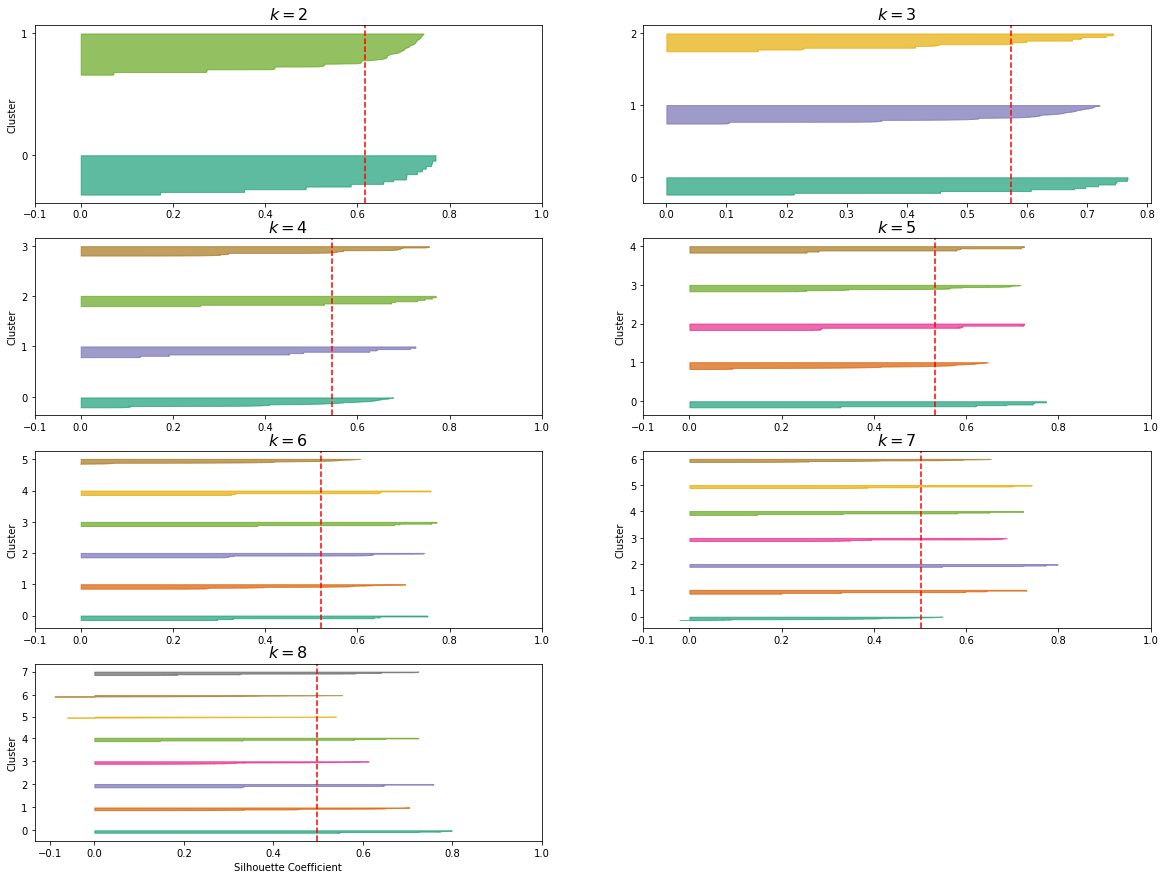

In [80]:
silhouette_diagram(kmeans_per_k_X1, X1, silhouette_scores_X1)

### **Observation: Silhouette Diagram**
The vertical dashed lines represent the silhouette score for each number of clusters.

When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters. We don't see this anywhere, infact starting at  𝑘  = 2, all the way to  𝑘  = 8, the clusters look pretty good: most instances extend upto or beyond the dashed line, to the right and closer to 1.0.

**However**, starting at $k$ = 5, we observe for some clusters the silhouette coefficient is decreasing, which indicates may be increasing the number of clusters might not be a good idea!




### **2: Feature Set MONTH & PCD**

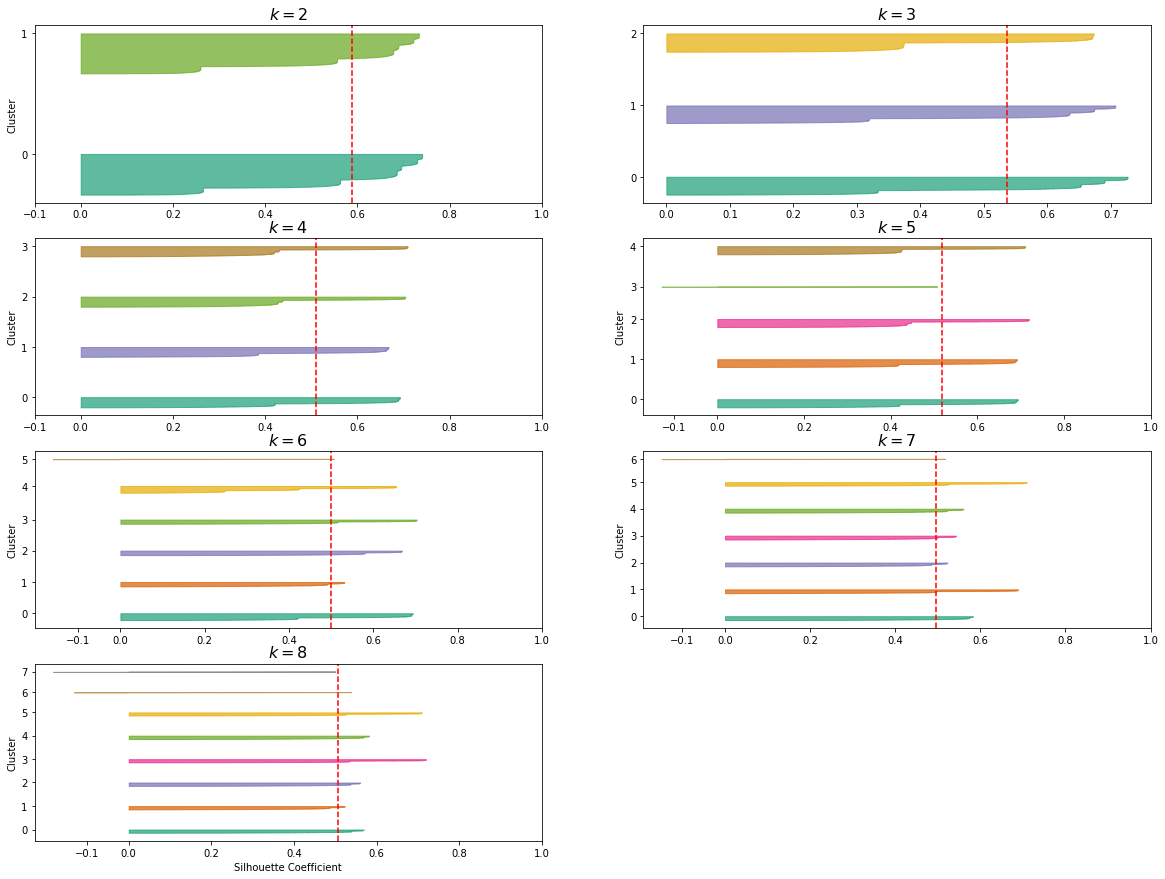

In [81]:
silhouette_diagram(kmeans_per_k_X2, X2, silhouette_scores_X2)

## **Observation: Silhouette Diagram**

Similarly, we observe that starting from $k$ = 5 the silhouette coefficients is getting smaller for some clusters and even negative for some! So definitely increasing the number of clusters is not a good sign.

### **Drawing scattered plot of the clusters for better visual**

### 1. Feature set YEAR & PCD

In [98]:

fig = plt.figure(figsize=(20, 10))
fig = px.scatter(X1, x='YEAR', y='PCD')
fig.show()

<Figure size 1440x720 with 0 Axes>

### **Observation:**

In the scattered plot, we can see that most of the data points for every year are very close to 0, but since the year 2008, we can see some volatility in PCD and we can also see and increasing trend!

### Feature set MONTH & PCD

In [101]:
fig = plt.figure(figsize=(20, 10))
fig = px.scatter(X2, x='MONTH', y='PCD')
fig.show()

<Figure size 1440x720 with 0 Axes>

### **Observation:**

We can see that, the month of february, march, and april has been been pretty volatile, and this could be because of the **Global Stock Crisis** caused by the COVID-19 pandemics

## **4. BIC & AIC**

With K-Means, we could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are **not spherical or have different sizes**.

Instead, we can try to find the model that minimizes a **theoretical information criterion**, such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC).

In [0]:
from sklearn.mixture import GaussianMixture

def bic_aic(X):
  #perfoming GMM clustering for k in range 1 to 15
  gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 15)]

  bics = [model.bic(X) for model in gms_per_k]
  aics = [model.aic(X) for model in gms_per_k]

  plt.figure(figsize=(20, 10))
  plt.plot(range(1, 15), bics, 'bo-', label='BIC')
  plt.plot(range(1, 15), aics, 'go--', label='AIC')
  plt.legend()
  plt.show()

  #finding optimal k
  min_bic = np.infty

  for k in range(1, 15):
    if bics[k-1] < min_bic:
      min_bic = bics[k-1]
      best_k = k

  print('\nOptimal k: {}'.format(best_k))

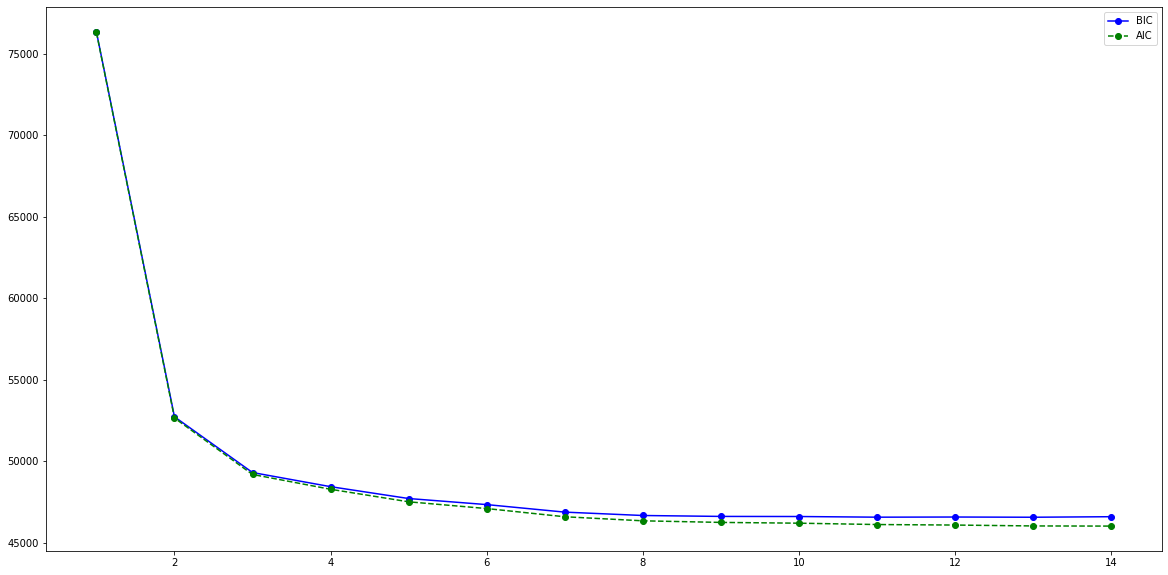


Optimal k: 13


In [110]:
bic_aic(X1)

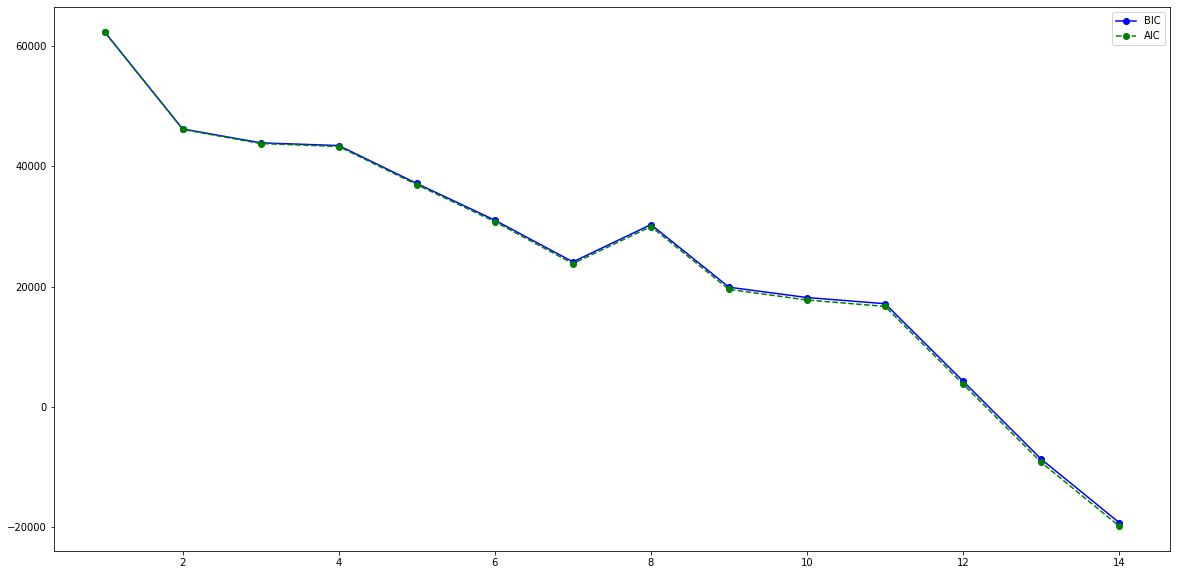


Optimal k: 14


In [111]:
bic_aic(X2)

### **Observation:**

Notice, that in both figures, the bic is continually decreasing!!! The more we increase the number of clusters, the less bic is obtained. So far, GMM is not able to decide the best optimal $k$ based on the bic & aic scores.